# The project: Heart Diseases Prediction

The goal of the competition is to predict heart diseases based on the given data. The target variable is 'cardio'. The evalution metric for the competition is ROC-AUC.

**Plan of the notebook:**
1. [Import of Modules & Files Opening](#importing)
2. [Data Preprocessing and Exploratory Data Analysis (EDA)](#preprocessing_and_eda)
3. [Development of ML-models](#ml_models)
4. [Conclusion](#conlusion)

<a name='importing'></a>
# 1. Import of Modules & Files Opening

In [1]:
%pip install phik
%pip install scikit-learn --upgrade
% pip install seaborn

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 8.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1
Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%` not found.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# train.csv dataset
df_train = pd.read_csv('/kaggle/input/yap15-heart-diseases-predictions/train.csv')
display(df_train.head())
display(df_train.info())

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/yap15-heart-diseases-predictions/train.csv'

In [ ]:
# test.csv dataset
df_test = pd.read_csv('/kaggle/input/yap15-heart-diseases-predictions/test.csv')
df_test_orig = df_test  # Original test.csv dataset
display(df_test.head())
display(df_test.info())

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,5,18888,1,154,85.000,130,80,1,1,0,0,1
1,6,19042,2,170,69.000,130,90,1,1,0,0,1
2,7,20432,1,160,70.000,120,75,1,1,0,0,0
3,10,18133,2,185,94.000,130,90,1,1,0,0,1
4,11,16093,2,170,76.000,120,80,1,1,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           30000 non-null  int64  
 1   age          30000 non-null  int64  
 2   gender       30000 non-null  int64  
 3   height       30000 non-null  int64  
 4   weight       30000 non-null  float64
 5   ap_hi        30000 non-null  int64  
 6   ap_lo        30000 non-null  int64  
 7   cholesterol  30000 non-null  int64  
 8   gluc         30000 non-null  int64  
 9   smoke        30000 non-null  int64  
 10  alco         30000 non-null  int64  
 11  active       30000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 2.7 MB


None

## Functions to be used further in the research

In [ ]:
def unique_values(col):
    print(f"Unique values of '{col}':")
    print("\tdf_train:", sorted(df_train[col].unique()))
    print("\tdf_test:", sorted(df_test[col].unique()))

In [ ]:
def create_hist(col):
    sns.histplot(
        df_train,
        x=col,
        hue='cardio',
        multiple='fill'
    )
    plt.ylabel('Portion')

def create_hist_for_several_values(col):
    sns.histplot(
        df_train,
        x=col,
        hue='cardio',
        multiple='fill',
        discrete=True
    )
    plt.ylabel('Portion')

<a name='preprocessing_and_eda'></a>
# 2. Data Preprocessing and Exploratory Data Analysis (EDA)

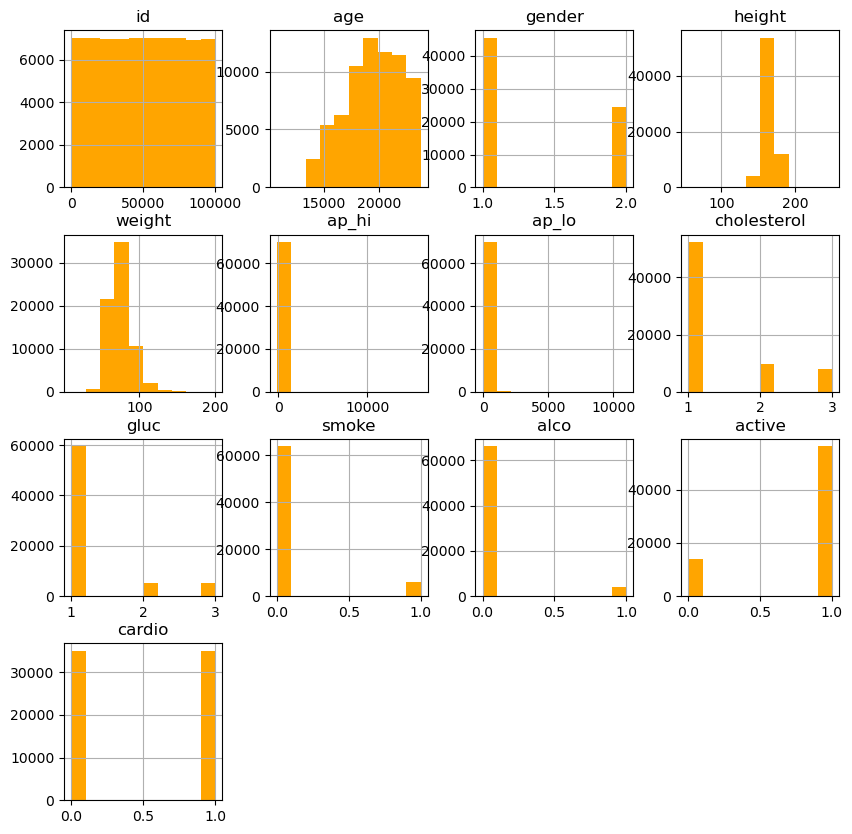

One of the things worth mentioning is the fact that according to the 'cardio' histogram, the classes are balanced.


In [ ]:
# Histograms for each of the columns
df_train.hist(figsize=(10, 10), color='orange')
plt.show()

print("One of the things worth mentioning is the fact that according to the 'cardio' histogram,",
      "the classes are balanced.")

Let's take a look at each of the predictors.

**Column 'id'**

In [ ]:
display(df_train['id'].head(10))
display(df_test['id'].head(10))

0     0
1     1
2     2
3     3
4     4
5     8
6     9
7    12
8    13
9    14
Name: id, dtype: int64

0     5
1     6
2     7
3    10
4    11
5    17
6    19
7    20
8    22
9    26
Name: id, dtype: int64

It is worth mentioning that ids that aren't in train.csv dataset are in test.csv dataset. That is why the ids don't match the indexes of the datasets.

In [ ]:
print("Number of unique ids:")
print("\tdf_train:", len(df_train['id'].unique()))
print('\tdf_test:', len(df_test['id'].unique()))

print("\nSince the number of unique ids is equal to the number of objects in each of the dataset, therefore,"
      "the 'id' column can be removed frmo both datasets.")

df_train = df_train.drop('id', axis=1)
df_test = df_test.drop('id', axis=1)

Number of unique ids:
	df_train: 70000
	df_test: 30000

Since the number of unique ids is equal to the number of objects in each of the dataset, therefore,the 'id' column can be removed frmo both datasets.


**Column 'age'**

In [ ]:
df_train['age'].sort_values()

22343    10798
30666    10859
6219     10878
55905    10964
31762    14275
         ...  
36603    23687
20931    23690
50714    23692
68005    23701
57191    23713
Name: age, Length: 70000, dtype: int64

The 'age' column shows 5-digit numbers. It is likely that these numbers show the amount of days since the birth of a person. In this regard the whole column can be deleted by 365 to show the amount of years or kept as it is.

In [ ]:
# def calculate_years(row):
#     age = row['age'] / 365
#     return age

# df_train['age'] = df_train.apply(calculate_years, axis=1)
# df_test['age'] = df_train.apply(calculate_years, axis=1)

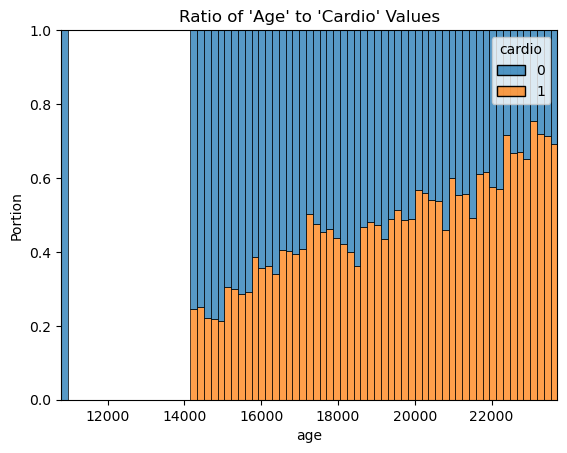

In [ ]:
create_hist('age')
plt.title("Ratio of 'Age' to 'Cardio' Values")
plt.show()

It can clearly be seen that the older a person gets the higher the chance of having a heart disease. Only around 20-25% of people at the age of about 40 have heart diseases and up to 70% of people at the age of close to 70 have heart disfunctions.

**Column 'gender'**

In [ ]:
unique_values('gender')

Unique values of 'gender':
	df_train: [1, 2]
	df_test: [1, 2]


Since we don't know what each of the values in 'gender' column stands for, we can assume the gender by looking at other indicators, for instance, 'height'. As a rule, men are taller than women, therefore, the gender, where people are higher on average corresponds to 'male'.

In [ ]:
print("Median height values by gender:")
print("\tgender = 1:", df_train[df_train['gender'] == 1]['height'].median())
print("\tgender = 2", df_train[df_train['gender'] == 2]['height'].median())

Median height values by gender:
	gender = 1: 161.0
	gender = 2 170.0


Since people with gender value of '2' are taller and men are taller than women, hence, '2' value of gender stands for 'men' and '1' for 'women'. Not to forget that insight, it might be necessary to rename 'gender' column to 'female' for instance. In this case, values would correlates with boolean values where '0' is 'False' and '1' is 'True'.

Let's change the value '2' to '0' so that the unique values of 'gender' predictor were '0' and '1'. And then rename the column to 'female'.

In [ ]:
df_train.loc[df_train['gender'] == 2, 'gender'] = 0
df_test.loc[df_test['gender'] == 2, 'gender'] = 0

df_train = df_train.rename(columns={'gender': 'female'})
df_test = df_test.rename(columns={'gender': 'female'})

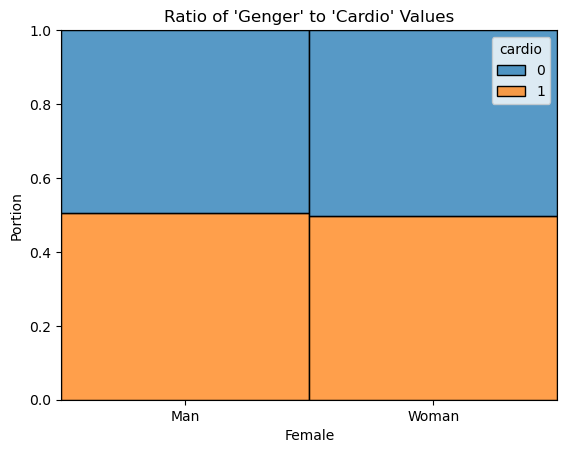

In [ ]:
create_hist_for_several_values('female')
plt.title("Ratio of 'Genger' to 'Cardio' Values")
plt.xlabel('Female')
plt.xticks(np.arange(2), ['Man', 'Woman'])
plt.show()

There isn't big difference between men and women regarding the presence of heart diseases. The values are almost identical.

**Column 'height'**

In [ ]:
unique_values('height')

Unique values of 'height':
	df_train: [55, 57, 59, 60, 64, 65, 66, 67, 68, 70, 71, 72, 74, 75, 76, 80, 81, 91, 96, 97, 98, 99, 100, 104, 105, 108, 109, 110, 111, 112, 113, 117, 119, 120, 122, 125, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 200, 207, 250]
	df_test: [50, 52, 56, 58, 60, 62, 65, 68, 72, 87, 100, 102, 105, 110, 114, 116, 119, 120, 122, 127, 130, 131, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198]


Taking into consideration the fact that the values are in cm, it can clearly be seen that there are some anomalies. It is mostly refers to extremely low values (< 120 cm).

The people with such values of height cannot be removed from training dataset, as there are people with similar height values. One of the ways to solve the issue is to use median data considering the gender of a person (as the there is a height difference depending on a gender).

Let's change 'height' values of people with lower value than 140 cm (the number of objects with such height is less than 0.01% of all the objects) to the median value depending on their gender.

In [ ]:
# train.csv
df_train.loc[
    (df_train['height'] < 140) & (df_train['female'] == 0),
    'height'
] = df_train[df_train['female'] == 0]['height'].median()
df_train.loc[
    (df_train['height'] < 140) & (df_train['female'] == 1),
    'height'
] = df_train[df_train['female'] == 1]['height'].median()

# test.csv
df_test.loc[
    (df_test['height'] < 140) & (df_test['female'] == 0),
    'height'
] = df_test[df_test['female'] == 0]['height'].median()
df_test.loc[
    (df_test['height'] < 140) & (df_test['female'] == 1),
    'height'
] = df_test[df_test['female'] == 1]['height'].median()

In addition let's change the value of the highest person - '250', which is almost the height of the tallest person in the world to the median level depending on the gender value.

P. S. There aren't such people in test dataset.

In [ ]:
display(df_train[df_train['height'] > 210]['female'])

df_train.loc[df_train['height'] > 210, 'height'] = df_train[df_train['female'] == 1]['height'].median()

6486    1
Name: female, dtype: int64

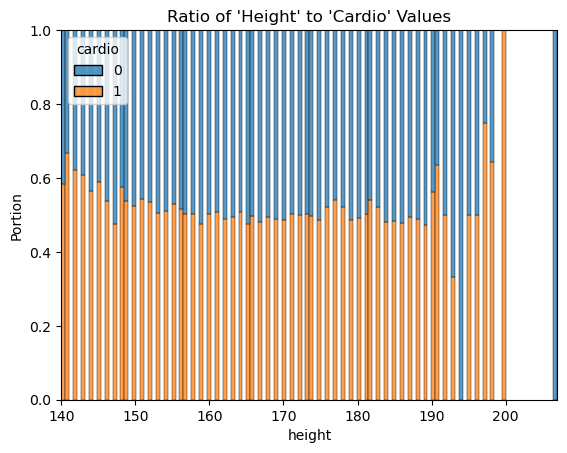

In [ ]:
create_hist('height')
plt.title("Ratio of 'Height' to 'Cardio' Values")
plt.show()

It is hard to say exactly whether there is significant dependence between the height of a person and the presence of heart disease. However, according to the histogram, more people to have heart diseases if there height is far from common (less than 150 or more than 190 cm).

**Column 'weight'**

In [ ]:
unique_values('weight')

Unique values of 'weight':
	df_train: [10.0, 11.0, 21.0, 22.0, 23.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 35.45, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 42.2, 43.0, 44.0, 45.0, 45.8, 46.0, 47.0, 48.0, 49.0, 50.0, 50.5, 50.7, 51.0, 51.5, 52.0, 52.3, 53.0, 53.2, 53.3, 53.5, 53.6, 53.67, 53.9, 54.0, 54.35, 54.5, 54.9, 55.0, 55.2, 55.4, 55.6, 56.0, 56.2, 57.0, 57.4, 57.6, 57.8, 58.0, 58.5, 58.7, 58.8, 59.0, 59.2, 59.5, 59.8, 60.0, 60.1, 60.2, 60.5, 60.6, 61.0, 61.2, 61.3, 61.5, 62.0, 62.2, 62.3, 62.4, 62.5, 62.7, 63.0, 63.4, 63.8, 63.82, 64.0, 64.1, 64.3, 64.5, 64.7, 64.8, 65.0, 65.3, 65.5, 66.0, 66.3, 66.4, 66.5, 67.0, 67.3, 67.5, 67.8, 67.9, 68.0, 68.2, 68.3, 68.4, 68.5, 68.9, 69.0, 69.5, 69.8, 70.0, 70.2, 70.3, 70.5, 70.7, 70.8, 71.0, 71.2, 71.3, 71.5, 72.0, 72.1, 72.5, 72.8, 73.0, 73.2, 73.5, 73.8, 74.0, 74.2, 74.3, 74.5, 74.77, 75.0, 75.2, 75.5, 75.6, 76.0, 76.5, 76.7, 76.8, 77.0, 78.0, 78.2, 78.5, 79.0, 79.5, 79.94, 80.0, 80.5, 80.6, 80.7, 80.8, 81.0, 81.1, 82.0, 82.1, 8

It is clear that we are dealing with kilograms and not pounds.

Since it's almost impossible for adult people to weigh as little as 30 or less kg (considering the fact that the lowest height is 140 cm), therefore, these values of weight will be changed to the median value considering their gender.

In [ ]:
df_train.loc[(df_train['female'] == 0) & (df_train['weight'] <= 30), 'weight'] = df_train[df_train['female'] == 0]['weight'].median()
df_train.loc[(df_train['female'] == 1) & (df_train['weight'] <= 30), 'weight'] = df_train[df_train['female'] == 1]['weight'].median()

df_test.loc[(df_train['female'] == 0) & (df_test['weight'] <= 30), 'weight'] = df_test[df_test['female'] == 0]['weight'].median()
df_test.loc[(df_train['female'] == 1) & (df_test['weight'] <= 30), 'weight'] = df_test[df_test['female'] == 1]['weight'].median()

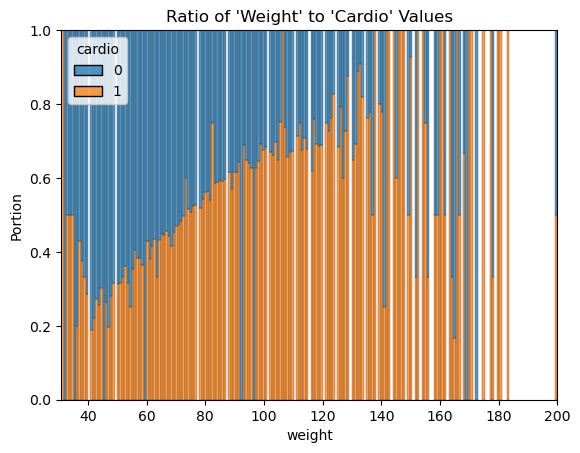

In [ ]:
create_hist('weight')
plt.title("Ratio of 'Weight' to 'Cardio' Values")
plt.show()

The portion of people with heart diseases increases with weight. At the end of histogram the values are distorted due to their deficiency. 
Taking into account this correlation between 'weight' and 'cardio' value, it might be reasonable to insert an additional column with body mass index.

In [ ]:
df_train['bmi'] = df_train['weight'] / ((df_train['height'] /100) ** 2)
df_test['bmi'] = df_test['weight'] / ((df_train['height'] /100) ** 2)

df_train = df_train.drop(['weight', 'height'], axis=1)
df_test = df_test.drop(['weight', 'height'], axis=1)

df_train['bmi'].sort_values()

16906   10.727
51837   11.765
58200   12.254
16322   12.856
38417   13.493
         ...  
37590   66.682
18952   67.846
40712   68.308
27384   68.670
36780   69.828
Name: bmi, Length: 70000, dtype: float64

**Columns 'ap_hi' & 'ap_lo'**

Columns 'ap_hi' and 'ap_lo' stand for systolic and diastolic blood pressure correspondingly. These numbers are positive. Moreover, systolic blood pressure ('ap_hi') must be more than diastolic one ('ap_lo'). As a matter of fact the highest recorder blood pressure was 310 / 220. However, the critical values are considered to be 260 / 160. In this regard, systolic and diastolic blood pressure should be not more than 260 and 160 respectively. It is also worth mentioning that the normal blood pressure for both men and women is equal.

Let's check whether the given data fits these criteria.

In [ ]:
print("Values of 'ap_hi':")
print("\tdf_train")
display(df_train['ap_hi'].sort_values())
print("\n\tdf_test")
display(df_test['ap_hi'].sort_values())

Values of 'ap_hi':
	df_train


35040     -150
23988     -140
46627     -120
25240     -120
16021     -115
         ...  
47253    14020
25464    14020
25519    14020
46912    14020
40852    16020
Name: ap_hi, Length: 70000, dtype: int64


	df_test


21811     -130
22231      -12
15510        1
1929         1
12852        1
         ...  
9399     14020
13563    14020
7755     14020
14449    14900
8852     16020
Name: ap_hi, Length: 30000, dtype: int64

In [ ]:
print("Values of 'ap_lo':")
print('\tdf_train:')
display(df_train['ap_lo'].sort_values())
print('\n\tdf_test:')
display(df_test['ap_lo'].sort_values())

Values of 'ap_lo':
	df_train:


60106      -70
40330        0
42397        0
56950        0
63787        0
         ...  
43434     9800
68538    10000
23849    10000
2381     10000
43326    11000
Name: ap_lo, Length: 70000, dtype: int64


	df_test:


24125     -90
18857       0
24538       0
15437       0
7906        0
         ... 
13161    8099
15242    8100
22352    8100
18976    9100
8085     9100
Name: ap_lo, Length: 30000, dtype: int64

In [ ]:
# Taking the absolute value of negative values
df_train.loc[df_train['ap_hi'] < 0, 'ap_hi'] *= -1
df_test.loc[df_test['ap_hi'] < 0, 'ap_hi'] *= -1

df_train.loc[df_train['ap_lo'] < 0, 'ap_lo'] *= -1
df_test.loc[df_test['ap_lo'] < 0, 'ap_lo'] *= -1

In [ ]:
# Dividing all the ap_hi values of more than 700 and all the ap_lo values of more than 500 by 10
df_train.loc[(df_train['ap_hi'] > 700), 'ap_hi'] /= 10
df_train.loc[df_train['ap_lo'] > 500, 'ap_hi'] /= 10

df_test.loc[df_test['ap_hi'] > 700, 'ap_hi'] /= 10
df_test.loc[df_test['ap_lo'] > 500, 'ap_hi'] /= 10

In [ ]:
# Some of the values may miss a zero, therefore, they should be multiplied by 10
df_train.loc[(df_train['ap_hi'] >= 7) & (df_train['ap_hi'] <= 26), 'ap_hi'] *= 10
df_train.loc[(df_train['ap_lo'] >= 5) & (df_train['ap_lo'] <= 16), 'ap_lo'] *= 10

df_test.loc[(df_test['ap_hi'] >= 7) & (df_test['ap_hi'] <= 26), 'ap_hi'] *= 10
df_test.loc[(df_test['ap_lo'] >= 5) & (df_test['ap_lo'] <= 16), 'ap_lo'] *= 10

In [ ]:
# Saving median values of ap_hi & ap_lo of each dataset to separate variables
train_median_ap_hi = df_train['ap_hi'].median()
test_median_ap_hi = df_test['ap_hi'].median()

train_median_ap_lo = df_train['ap_lo'].median()
test_median_ap_lo = df_test['ap_lo'].median()

In [ ]:
# If ap_hi > 260 / ap_hi < 70 or ap_lo > 160 / ap_lo < 50, change to median values
df_train.loc[(df_train['ap_hi'] > 260) | (df_train['ap_hi'] < 70), 'ap_hi'] = train_median_ap_hi
df_test.loc[(df_test['ap_hi'] > 260) | (df_test['ap_hi'] < 70), 'ap_hi'] = test_median_ap_hi

df_train.loc[(df_train['ap_lo'] > 160) | (df_train['ap_lo'] < 50), 'ap_lo'] = train_median_ap_lo
df_test.loc[(df_test['ap_lo'] > 160) | (df_test['ap_lo'] < 50), 'ap_lo'] = test_median_ap_lo

In [ ]:
# ap_hi & ap_lo should also change to median values if ap_lo > ap_hi which is incorrect by definition
df_train.loc[df_train['ap_hi'] < df_train['ap_lo'], 'ap_hi'] = train_median_ap_hi
df_test.loc[df_test['ap_hi'] < df_test['ap_lo'], 'ap_hi'] = test_median_ap_hi

df_train.loc[df_train['ap_hi'] < df_train['ap_lo'], 'ap_lo'] = train_median_ap_lo
df_test.loc[df_test['ap_hi'] < df_test['ap_lo'], 'ap_lo'] = test_median_ap_lo

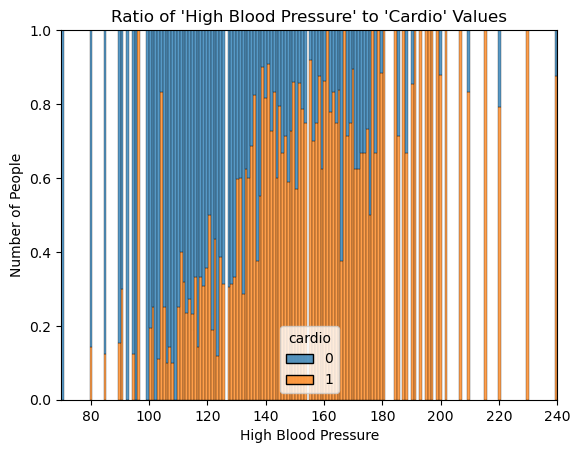

In [ ]:
create_hist('ap_hi')
plt.title("Ratio of 'High Blood Pressure' to 'Cardio' Values")
plt.xlabel("High Blood Pressure")
plt.ylabel('Number of People')
plt.show()

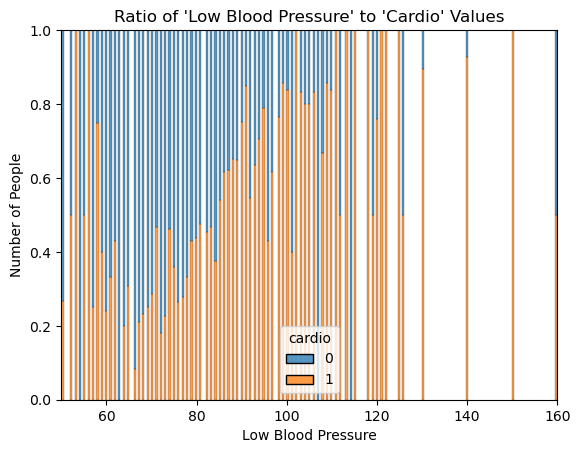

In [ ]:
create_hist('ap_lo')
plt.title("Ratio of 'Low Blood Pressure' to 'Cardio' Values")
plt.xlabel("Low Blood Pressure")
plt.ylabel('Number of People')
plt.show()

**Column 'Cholesterol'**

It is likely that different values of Cholersterol refer to different amoutn of cholesterol. In this particular case the cholesterol levels are divided into three group with the values of 1, 2 and 3 correpsondingly.

In [ ]:
unique_values('cholesterol')

Unique values of 'cholesterol':
	df_train: [1, 2, 3]
	df_test: [1, 2, 3]


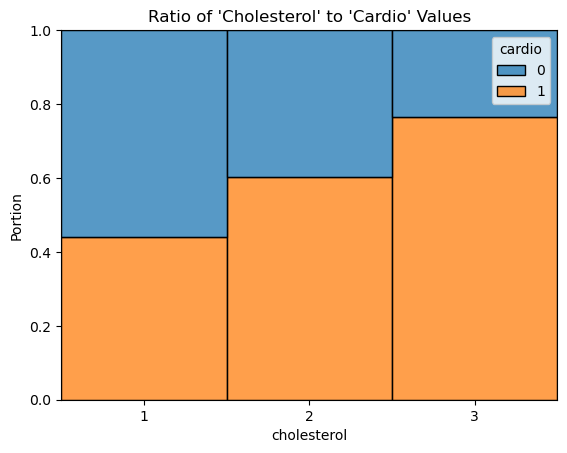

In [ ]:
create_hist_for_several_values('cholesterol')
plt.title("Ratio of 'Cholesterol' to 'Cardio' Values")
plt.xticks(np.arange(1, 4))
plt.show()

People with the value of 'Cholesterol' of 3 hvae heart diseases more often than others which can clearly be seen on the histogram above.

**Column 'gluc'**

Glucose parameter as well as cholesterol indicates the level of glucose in blood of a person. The glucose levels are also divided into 3 groups: 1, 2 and 3 respectively.

In [ ]:
unique_values('gluc')

Unique values of 'gluc':
	df_train: [1, 2, 3]
	df_test: [1, 2, 3]


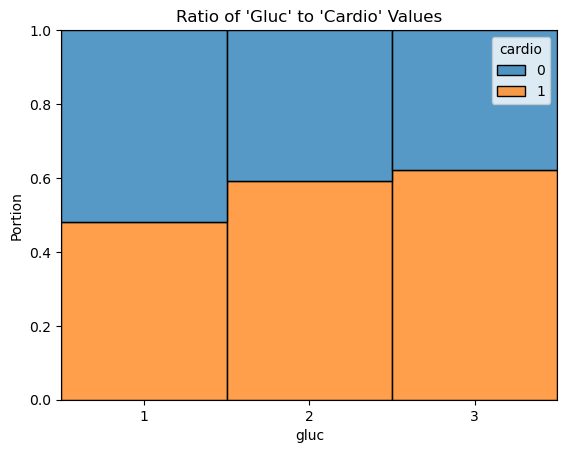

In [ ]:
create_hist_for_several_values('gluc')
plt.title("Ratio of 'Gluc' to 'Cardio' Values")
plt.xticks(np.arange(1, 4))
plt.show()

With the increase of glucose level in blood grows the chance of having a heart disease, as around 60% of people with glucose level 3 have heart diseases.

**Column 'smoke'**

In [ ]:
unique_values('smoke')

Unique values of 'smoke':
	df_train: [0, 1]
	df_test: [0, 1]


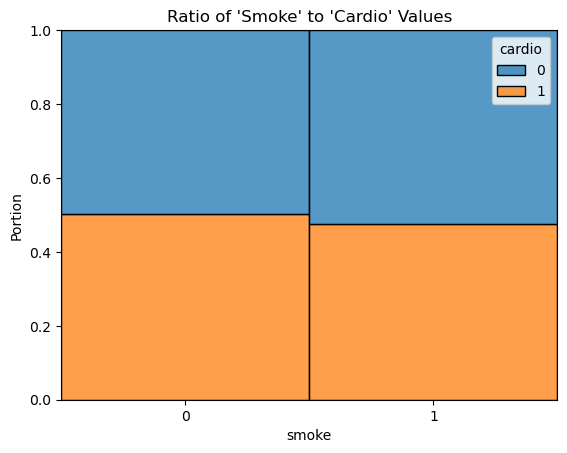

In [ ]:
create_hist_for_several_values('smoke')
plt.title("Ratio of 'Smoke' to 'Cardio' Values")
plt.xticks(np.arange(0, 2))
plt.show()

Surpisingly, people who smoke more seldom have heart diseases than others according to the graph shown above. However, the difference is slight and this statement may not be true for 100%.

**Column 'alco'**

In [ ]:
unique_values('alco')

Unique values of 'alco':
	df_train: [0, 1]
	df_test: [0, 1]


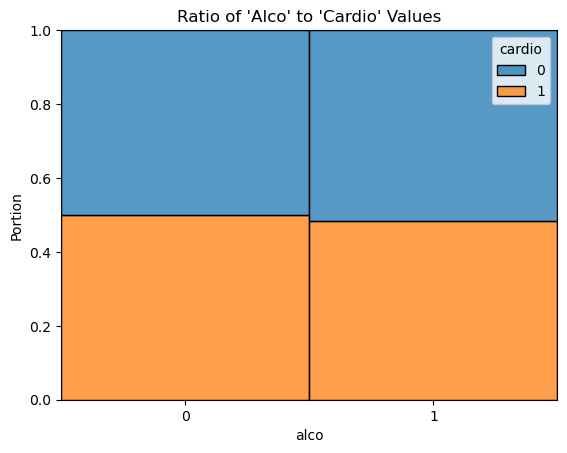

In [ ]:
create_hist_for_several_values('alco')
plt.title("Ratio of 'Alco' to 'Cardio' Values")
plt.xticks(np.arange(0, 2))
plt.show()

According to the histogram, people who drink alcohol are slightly less likely to have heart diseases. Nonetheless, the difference is miserable.

**Column 'active'**

In [ ]:
unique_values('active')

Unique values of 'active':
	df_train: [0, 1]
	df_test: [0, 1]


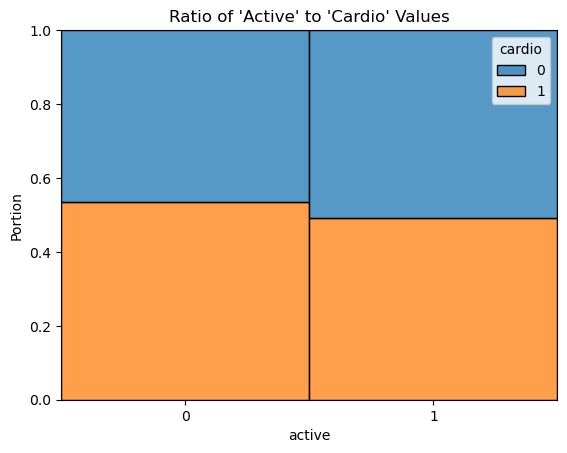

In [ ]:
create_hist_for_several_values('active')
plt.title("Ratio of 'Active' to 'Cardio' Values")
plt.xticks(np.arange(0, 2))
plt.show()

Among active people heart diseases occur a little more rarely than among non-active ones. 

**Phik correlation between all of the parameters**

interval columns not set, guessing: ['age', 'female', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi']


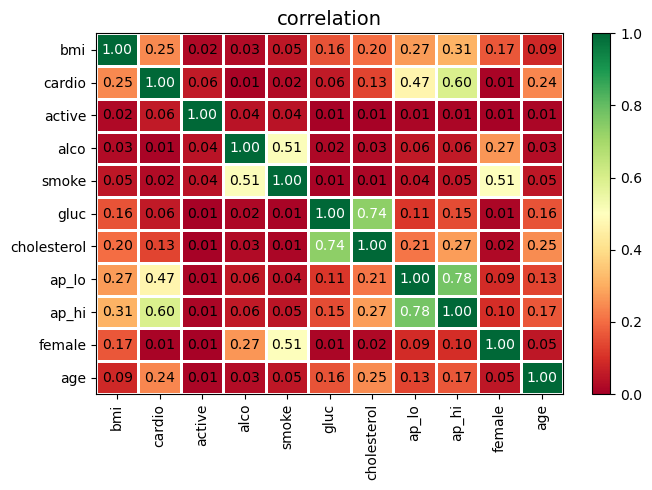

In [ ]:
phik_overview = df_train.phik_matrix()
phik_overview.round(2)

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0,
    vmax=1    
)

There are various correlations between the target variable - 'cardio' - and predictors. High blood pressure correlates relatively high with the presence of heart disease. The index of correlation phik for this parameters are 0.60. The next one is low blood pressure with the index of 0.47. Then go body mass index, age and weight with the indexes of 0.25, 0.24 and 0.23 correspondingly.

<a name='ml_models'></a>
# 4. Development of ML-models

This is a task of classification, therefore, relevant models should be used. Under this project, it will be:
- DecisionTreeClassifier;
- RandomForestClassifier;
- LogisticRegression;
- SVC (Support Vector Classifier);
- KNN (K-Nearest Neighbors).

The evaluation metric for this competition is **ROC-AUC**.

In [ ]:
# Dividing the df_train into train and valid datasets.
X = df_train.drop('cardio', axis=1)
y = df_train['cardio']

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, random_state=42, test_size=0.25
)

In [ ]:
# Preparing column transformer
# numeric_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']
numeric_columns = ['age', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'bmi']
skip_columns = ['female', 'smoke', 'alco', 'active']
scoring = 'roc_auc'
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('numeric_transformer', numeric_transformer, numeric_columns),
    ('skip', 'passthrough', skip_columns)
])

In [ ]:
def show_best_metrics(model):
    final_metrics = pd.DataFrame(model.cv_results_)['mean_test_score'].iloc[model.best_index_]

    print(model.best_estimator_)
    print("\nROC-AUC: {:.3f}".format(final_metrics))

**DecisionTreeClassifier**

In [ ]:
# tree = DecisionTreeClassifier(random_state=42)
# tree_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', tree)])
# tree_params = {
#     'classifier__max_depth': range(2, 21, 2),
#     'classifier__criterion': ['gini', 'entropy']
# }

# gs_tree = GridSearchCV(tree_pipe, tree_params, cv=5, scoring=scoring)
# gs_tree.fit(X_train, y_train)

# show_best_metrics(gs_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=12345)

ROC-AUC: 0.795

**RandomForestClassifier**

In [ ]:
# forest = RandomForestClassifier(random_state=42)
# forest_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', forest)])
# forest_params = {
#     'classifier__max_depth': range(2, 21, 2),
#     'classifier__n_estimators': range(50, 351, 50),
#     'classifier__criterion': ['gini', 'entropy']
# }

# gs_forest = GridSearchCV(forest_pipe, forest_params, cv=5, scoring=scoring)
# gs_forest.fit(X_train, y_train)

# show_best_metrics(gs_forest)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=350, random_state=42)

ROC-AUC: 0.801

**LogisticRegression**

In [ ]:
# logreg = LogisticRegression(random_state=42, solver='liblinear')
# logreg_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logreg)])
# logreg_params = {
#     'classifier__penalty': ('l1', 'l2'),
#     'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'classifier__max_iter': range(100, 501, 100)
# }

# gs_logreg = GridSearchCV(logreg_pipe, logreg_params, cv=5, scoring=scoring)
# gs_logreg.fit(X_train, y_train)

# show_best_metrics(gs_logreg)

LogisticRegression(C=0.1, random_state=42)

ROC-AUC: 0.793

In [ ]:
# svc = SVC(random_state=42)
# svc_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', svc)])
# svc_params = {
#     'classifier__C': [0.1, 2, 5, 10],
#     'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'classifier__gamma': ['scale', 'auto',]
# }

# gs_svc = GridSearchCV(svc_pipe, svc_params, cv=5, scoring=scoring)
# gs_svc.fit(X_train, y_train)

# show_best_metrics(gs_svc)

SVC(C=0.1, gamma='auto', random_state=12345)

ROC-AUC: 0.792

In [ ]:
# knn = KNeighborsClassifier()
# knn_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', knn)])
# knn_params = {
#     'classifier__n_neighbors': range(1, 11),
#     'classifier__weights': ['uniform', 'distance'],
#     'classifier__leaf_size': range(30, 121, 30),
#     'classifier__p': [1, 2, 3]
# }

# gs_knn = GridSearchCV(knn_pipe, knn_params, cv=5, scoring=scoring, refit='accuracy')
# gs_knn.fit(X_train, y_train)

# show_best_metrics(gs_knn)

KNeighborsClassifier(leaf_size=90, n_neighbors=10, p=3)

ROC-AUC: 0.772

**Preminary Conclusion**

The best value of ROC-AUC shows the RandomForestClassifier model with the following hyperparameters:

- criterion: 'entropy';
- max_depth: 10;
- n_estimators: 350.

The value of ROC-AUC with this model reaches 0.801. Let's test the model on valid dataset.

In [ ]:
best_forest = RandomForestClassifier(random_state=42, criterion='entropy', n_estimators=350, max_depth=10)
best_forest_pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', best_forest)])
best_forest_pipe.fit(X_train, y_train)
y_pred = best_forest_pipe.predict(X_valid)

auc_roc = roc_auc_score(y_valid, y_pred)
print("RandomForestClassifier AUC-ROC: {:.3f}".format(auc_roc))

RandomForestClassifier AUC-ROC: 0.739


In [ ]:
# Let's create a separate model for the heart disease app

from pickle import dump

with open("./main.pcl", "wb") as model_file:
    dump(best_forest_pipe, model_file)

**Final predictions:**

In [ ]:
X_test = df_test

best_forest_pipe.fit(X_train, y_train)
y_test_pred = best_forest_pipe.predict(X_test)

y_final_pred = pd.DataFrame(
    y_test_pred,
    index=df_test_orig['id'],
    columns=['cardio']
)

y_final_pred.to_csv('submission.csv')

In [ ]:
y_final_pred.sum()

cardio    13470
dtype: int64

<a name='conclusion'></a>
## 4. Conclusion

In order to make a model that defines whether a person has a heart disease, first, it was necessary to make data preprocessing. Despite the fact that there aren't any missing values in the given datasets, some abnormal values took place and they had to be processed. 

The models were chosen based on the fact that we are dealing with classification tasks. The following models were considered: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression, K-Nearest Neighbor & Support Vector Machine. The best model out of all of them based on the evaluation metric of the project - ROC-AUC - is **RandomForestClassifier** with the following hyperparameters:
- criterion: 'entropy';
- max_depth: 10;
- n_estimators: 350.

The ROC-AUC values on the train dataset was 0.801 while on the valid dataset - 0.739.

The final submission file was made by predicting the values of each person in test.csv dataset using the best found model.